In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load Data

In [15]:
# Load data
df = pd.read_csv("data_preprocessed.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.524780,1.0,0.792992,0.622545,0.666667,1.0,0.465753,0.625000,0.0,0.0,0.711022,1.0,0.338009,0.000000,0.666667,0.75,3
1,0.258801,0.0,0.297105,0.325484,0.666667,1.0,0.023310,0.507414,0.0,0.0,0.042645,1.0,0.000000,0.646730,0.666667,0.75,2
2,0.475505,1.0,0.723608,0.355762,0.666667,1.0,0.285714,0.000000,0.0,0.0,0.362750,1.0,0.498366,0.400000,0.000000,0.75,5
3,0.424484,1.0,0.544808,0.426051,1.000000,1.0,0.285714,0.625000,0.0,0.0,0.555116,1.0,0.720433,0.514847,0.666667,0.75,2
4,0.499824,1.0,0.749063,0.623040,0.666667,1.0,0.544648,0.528761,0.0,0.0,0.520723,1.0,0.249183,0.144864,0.666667,0.75,3


In [16]:
df['NObeyesdad'].value_counts()

NObeyesdad
3    246
2    246
5    246
4    246
1    246
6    246
0    246
Name: count, dtype: int64

Split kedua (sesudah preprocessing):

Kamu sudah anggap dataset siap pakai (hasil SMOTE), lalu mau bagi ulang menjadi train/test untuk pemodelan.

In [17]:
X_train = df.drop('NObeyesdad', axis=1)
y_train = df['NObeyesdad']

X_test, y_test = joblib.load('test_data.pkl')  # dari preprocessing

# Modeling and Evaluation

Modeling yang digunakan ada 3 yaitu :
- Decision Tree
- Random Forest
- SVM

In [18]:
# Inisialisasi model
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

In [19]:
# Untuk menyimpan hasil evaluasi
results = {}

fungsi Looping untuk melihat hasil Evaluasi dari modeling yang meliputi:
- Akurasi
- Precision
- Recall
- F1-Score
- Confusion Matriks

yang disimpan dan dikemas dalam classfication report

In [20]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "conf_matrix": confusion_matrix(y_test, y_pred)
    }

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))

D:\Bengkod\UAS_CAPSTONE PROJECT BENGKEL KODING\test_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        81
           1       0.78      0.78      0.78        86
           2       0.90      0.91      0.91       105
           3       0.95      0.94      0.95        89
           4       0.99      0.97      0.98        97
           5       0.77      0.81      0.79        83
           6       0.88      0.86      0.87        87

    accuracy                           0.89       628
   macro avg       0.88      0.88      0.88       628
weighted avg       0.89      0.89      0.89       628


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        81
           1       0.82      0.95      0.88        86
           2       0.96      0.94      0.95       105
           3       1.00      0.99      0.99        89
           4       1.00      1.00      1.00        97
           5       0.95      0.8

D:\Bengkod\UAS_CAPSTONE PROJECT BENGKEL KODING\test_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Bengkod\UAS_CAPSTONE PROJECT BENGKEL KODING\test_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Menampilkan Bar perbandingan antara ketiga model dengan parameter confusion matriks

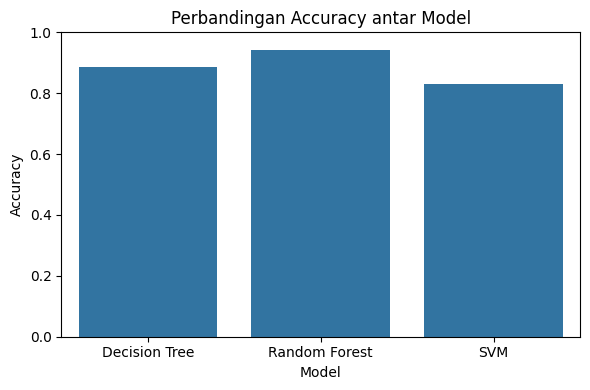

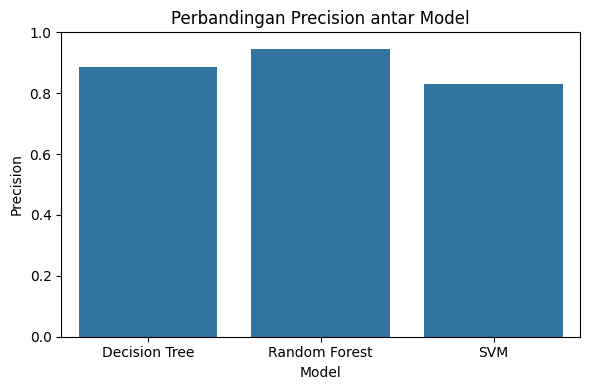

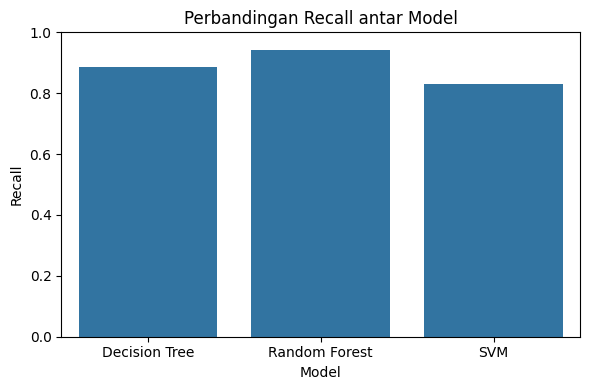

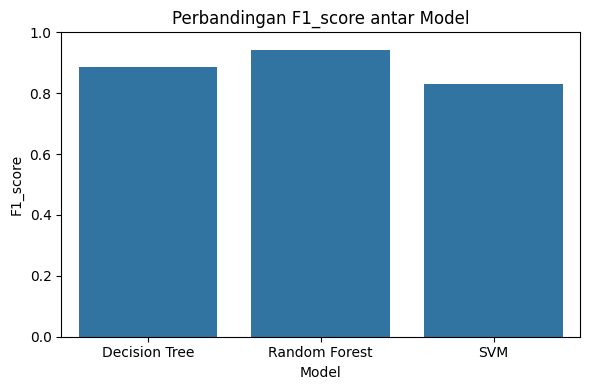

In [21]:
# Visualisasi perbandingan metrik
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.title(f'Perbandingan {metric.capitalize()} antar Model')
    sns.barplot(x=list(results.keys()), y=[results[m][metric] for m in results])
    plt.ylim(0, 1)
    plt.ylabel(metric.capitalize())
    plt.xlabel("Model")
    plt.tight_layout()
    plt.show()

Menampilkan Visualisasi dari Confusion Matriks dari ketiga model tersebut

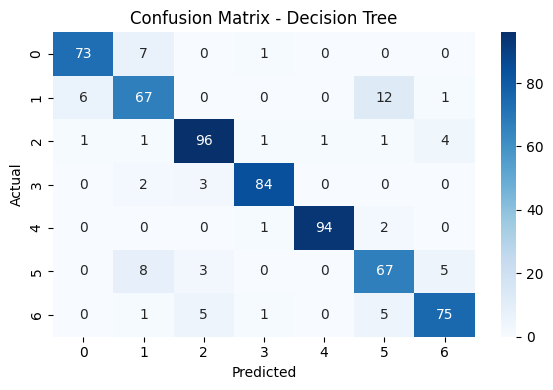

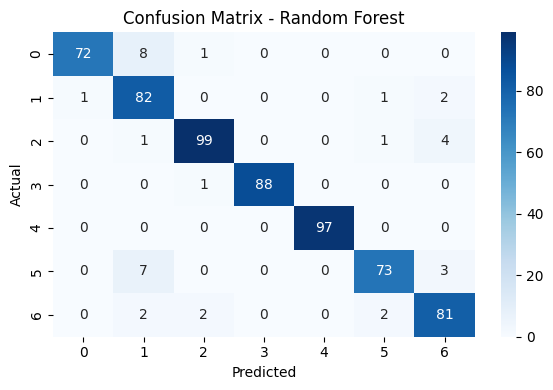

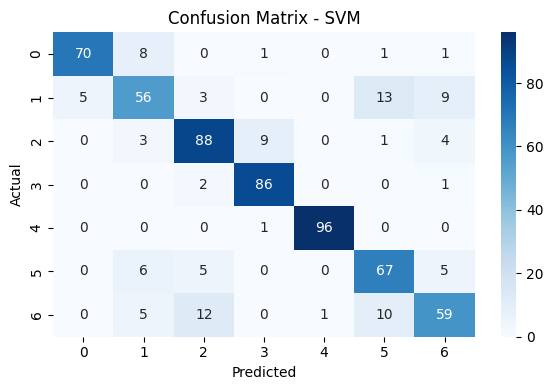

In [22]:
# Visualisasi confusion matrix
for name in results:
    plt.figure(figsize=(6, 4))
    sns.heatmap(results[name]['conf_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

Kesimpulan Modeling:

Dari ketiga model yang diuji (Decision Tree, Random Forest, dan SVM), terlihat bahwa model Random Forest memberikan performa terbaik secara keseluruhan, dengan nilai akurasi, presisi, recall, dan F1-score yang lebih tinggi dibandingkan Decision Tree dan SVM.

# Hyperparameter Tuning

Ini adalah class yang digunakan untuk mencari kombinasi hyperparameter terbaik berdasarkan cross-validation.

In [23]:
from sklearn.model_selection import GridSearchCV

### Decision Tree 

 Mendefinisikan grid parameter

In [24]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

Membuat objek GridSearchCV

In [25]:
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

Melatih dan mengambil model terbaik, kemudian prediksi pada data uji.

In [26]:
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_

y_pred_dt = best_dt.predict(X_test)

D:\Bengkod\UAS_CAPSTONE PROJECT BENGKEL KODING\test_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Menampilkan performa akhir setelah tuning

In [27]:
print("\n=== Decision Tree (Tuned) ===")
print(classification_report(y_test, y_pred_dt))


=== Decision Tree (Tuned) ===
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        81
           1       0.80      0.90      0.85        86
           2       0.90      0.96      0.93       105
           3       1.00      0.94      0.97        89
           4       0.98      0.96      0.97        97
           5       0.86      0.80      0.82        83
           6       0.91      0.93      0.92        87

    accuracy                           0.91       628
   macro avg       0.92      0.91      0.91       628
weighted avg       0.92      0.91      0.91       628



### Random Forest

In [28]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [29]:
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)


In [30]:
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

D:\Bengkod\UAS_CAPSTONE PROJECT BENGKEL KODING\test_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
print("\n=== Random Forest (Tuned) ===")
print(classification_report(y_test, y_pred_rf))


=== Random Forest (Tuned) ===
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        81
           1       0.83      0.97      0.89        86
           2       0.93      0.94      0.94       105
           3       1.00      0.98      0.99        89
           4       1.00      0.98      0.99        97
           5       0.94      0.93      0.93        83
           6       0.94      0.91      0.92        87

    accuracy                           0.94       628
   macro avg       0.95      0.94      0.94       628
weighted avg       0.95      0.94      0.94       628



### SVM

In [32]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [33]:
grid_svm = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid_svm,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

In [34]:
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

D:\Bengkod\UAS_CAPSTONE PROJECT BENGKEL KODING\test_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [35]:
print("\n=== SVM (Tuned) ===")
print(classification_report(y_test, y_pred_svm))


=== SVM (Tuned) ===
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        81
           1       0.78      0.76      0.77        86
           2       0.92      0.93      0.92       105
           3       0.97      0.96      0.96        89
           4       1.00      1.00      1.00        97
           5       0.76      0.83      0.79        83
           6       0.85      0.82      0.83        87

    accuracy                           0.88       628
   macro avg       0.88      0.88      0.88       628
weighted avg       0.88      0.88      0.88       628



#### Membandingkan Performa sebelum dan Sesudah Tuning

In [36]:
# Data performa sebelum tuning
before = {
    "Decision Tree": results["Decision Tree"],
    "Random Forest": results["Random Forest"],
    "SVM": results["SVM"]
}

In [37]:
# Data performa sesudah tuning
after = {
    "Decision Tree": {
        "accuracy": accuracy_score(y_test, y_pred_dt),
        "precision": precision_score(y_test, y_pred_dt, average='weighted'),
        "recall": recall_score(y_test, y_pred_dt, average='weighted'),
        "f1_score": f1_score(y_test, y_pred_dt, average='weighted')
    },
    "Random Forest": {
        "accuracy": accuracy_score(y_test, y_pred_rf),
        "precision": precision_score(y_test, y_pred_rf, average='weighted'),
        "recall": recall_score(y_test, y_pred_rf, average='weighted'),
        "f1_score": f1_score(y_test, y_pred_rf, average='weighted')
    },
    "SVM": {
        "accuracy": accuracy_score(y_test, y_pred_svm),
        "precision": precision_score(y_test, y_pred_svm, average='weighted'),
        "recall": recall_score(y_test, y_pred_svm, average='weighted'),
        "f1_score": f1_score(y_test, y_pred_svm, average='weighted')
    }
}

In [38]:
metrics = ["accuracy", "precision", "recall", "f1_score"]
model_names = ["Decision Tree", "Random Forest", "SVM"]
x = np.arange(len(model_names))
width = 0.2

Untuk setiap metrik, dibuat plot batang membandingkan skor sebelum dan sesudah tuning.
results berisi performa sebelum tuning (yang kamu sudah buat sebelumnya).
Setelah tuning, dihitung ulang metrik dan disimpan ke dictionary after.

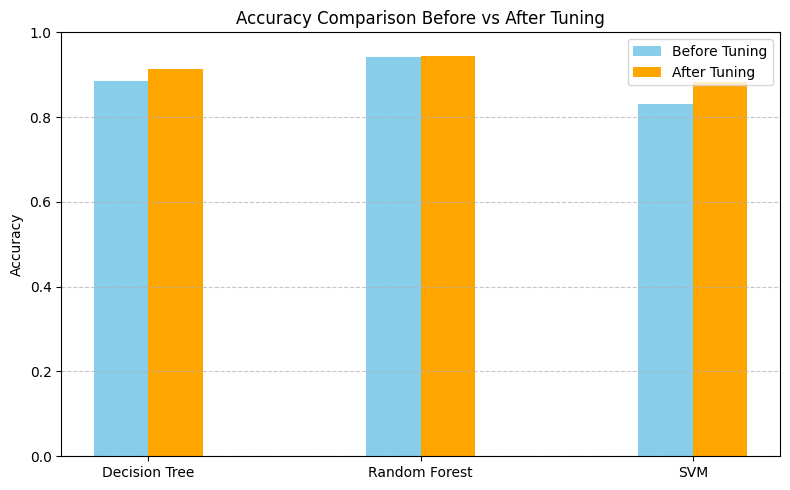

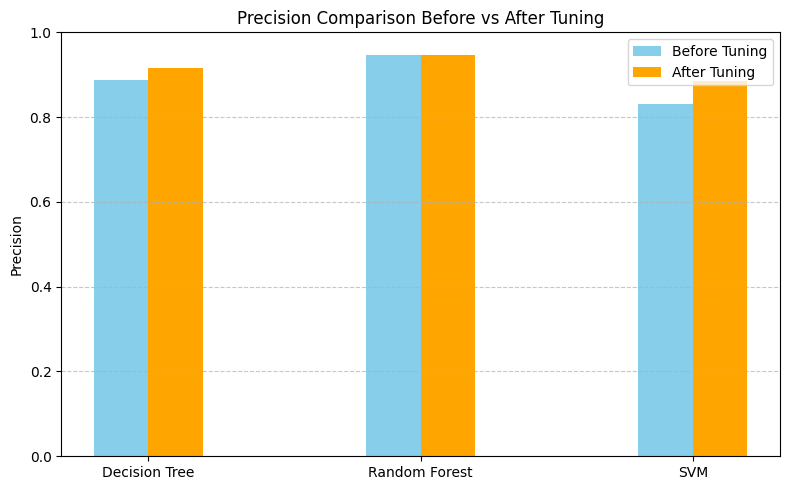

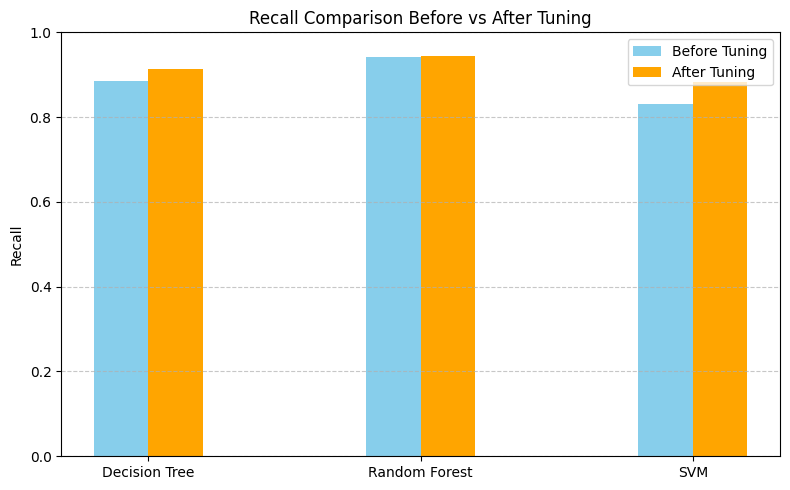

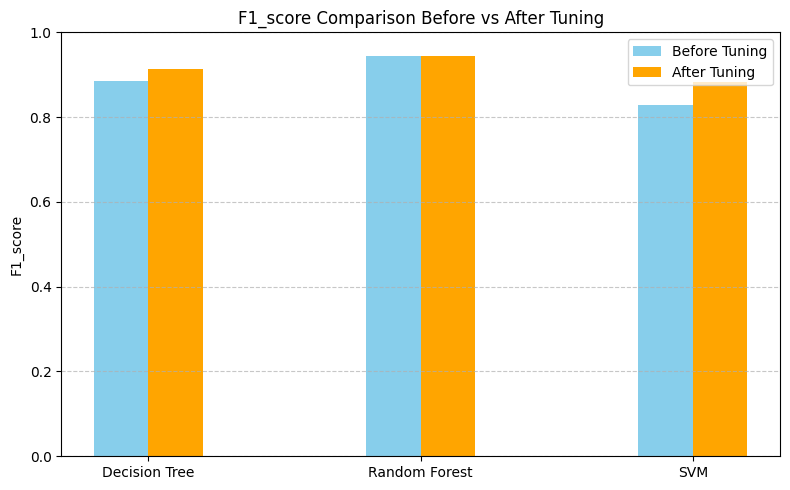

In [39]:
for metric in metrics:
    plt.figure(figsize=(8, 5))
    before_scores = [before[model][metric] for model in model_names]
    after_scores = [after[model][metric] for model in model_names]
    
    plt.bar(x - width/2, before_scores, width, label='Before Tuning', color='skyblue')
    plt.bar(x + width/2, after_scores, width, label='After Tuning', color='orange')
    
    plt.xticks(x, model_names)
    plt.ylim(0, 1)
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} Comparison Before vs After Tuning')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Kesimpulan :

Berdasarkan hasil evaluasi sebelum dan sesudah dilakukan hyperparameter tuning, model SVM mengalami peningkatan performa paling signifikan, dari akurasi 77% menjadi 86%. Ini menunjukkan bahwa SVM sangat bergantung pada pengaturan parameter yang sesuai dengan karakteristik data.

Sementara itu, Random Forest tetap menjadi model terbaik secara umum, bahkan tanpa perlu banyak tuning. 

In [40]:
import joblib

# Simpan model hasil hypertuning
joblib.dump(best_dt, 'model_dt.pkl')
joblib.dump(best_rf, 'model_rf.pkl')
joblib.dump(best_svm, 'model_svm.pkl')

['model_svm.pkl']